# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Zefanya Danovanta Tarigan     
**NIM:** 122140101

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


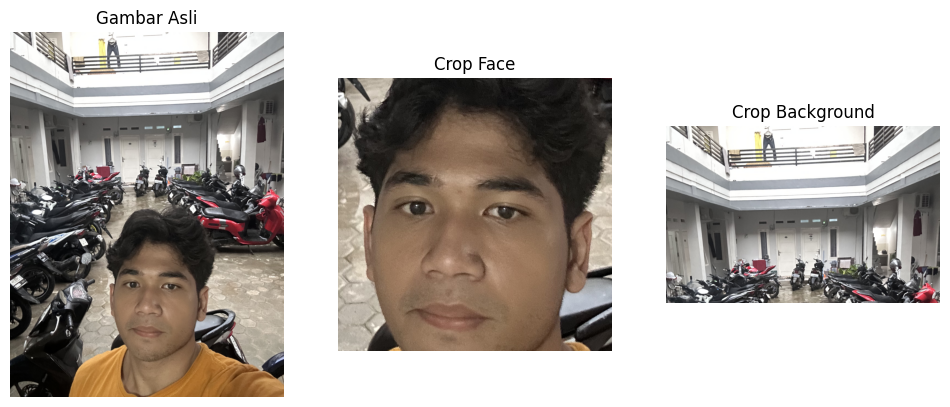

True

In [47]:
import cv2 
import matplotlib.pyplot as plt
import os

soal1_path = os.path.join(os.getcwd(), "assets_ws4", "soal1.jpg")
soal1 = cv2.imread(soal1_path)

#Face Crop
x = 750 
y = 1660 
size = 1000
right_face = x + size
lower_face = y + size
crop_face = soal1[y:lower_face, x:right_face]

height, width = soal1.shape[:2]

# Background Crop 
left_bg = 0 # x
upper_bg = 0 # y
right_bg = width
lower_bg = 1500
crop_bg = soal1[upper_bg:lower_bg, left_bg:right_bg]

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(soal1, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB))
plt.title("Crop Face")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(crop_bg, cv2.COLOR_BGR2RGB))
plt.title("Crop Background")
plt.axis("off")
plt.show()

cv2.imwrite(os.path.join("results_ws4", "Soal01-CropFace.jpg"), crop_face)
cv2.imwrite(os.path.join("results_ws4", "Soal01-CropBackground.jpg"), crop_bg)


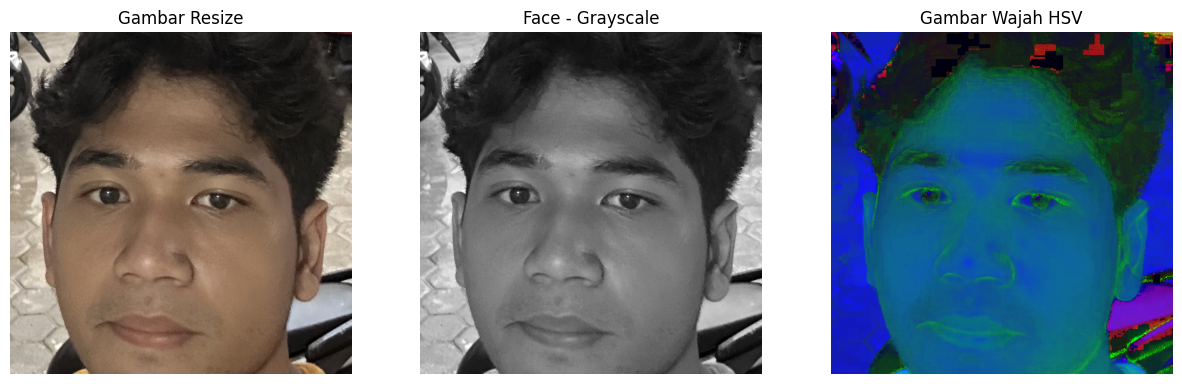

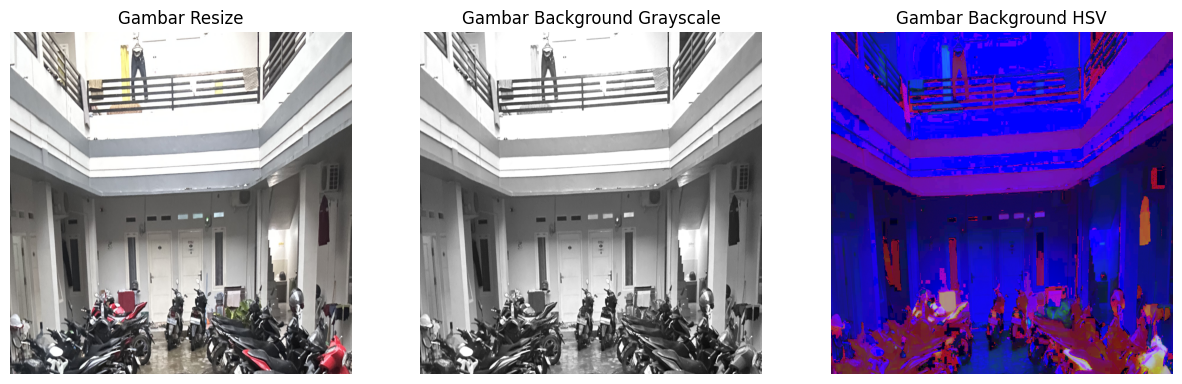

True

In [ ]:
# Resize Gambar menjadi 920 x 920 piksel 
face_resize = cv2.resize(crop_face, (920,920))
bg_resize = cv2.resize(crop_bg, (920,920))

#Konversi Gambar Grayscale
face_Gray = cv2.cvtColor(face_resize, cv2.COLOR_BGR2GRAY)
bg_Gray = cv2.cvtColor(bg_resize, cv2.COLOR_BGR2GRAY)

#Konversi Gambar HSV 
face_hsv = cv2.cvtColor(face_resize, cv2.COLOR_BGR2HSV)
bg_hsv = cv2.cvtColor(bg_resize, cv2.COLOR_BGR2HSV)

#Menampilkan Gambar
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(cv2.cvtColor(face_resize, cv2.COLOR_BGR2RGB))
axs[0].set_title("Gambar Resize")
axs[0].axis("off")

# Tampilan Gambar Wajah
axs[1].imshow(face_Gray, cmap='gray')
axs[1].set_title("Face - Grayscale")
axs[1].axis("off")

axs[2].imshow(face_hsv)
axs[2].set_title("Gambar Wajah HSV")
axs[2].axis("off")
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15, 7))
axs[0].imshow(cv2.cvtColor(bg_resize, cv2.COLOR_BGR2RGB))
axs[0].set_title("Gambar Resize")
axs[0].axis("off")

# Tampilan Gambar Background
axs[1].imshow(bg_Gray, cmap='gray')
axs[1].set_title("Gambar Background Grayscale")
axs[1].axis("off")

axs[2].imshow(bg_hsv)
axs[2].set_title("Gambar Background HSV")
axs[2].axis("off") 
plt.show()

cv2.imwrite(os.path.join("results_ws4", "Soal01-FaceResize.jpg"), face_resize)
cv2.imwrite(os.path.join("results_ws4", "Soal01-FaceGray.jpg"), face_Gray)
cv2.imwrite(os.path.join("results_ws4", "Soal01-FaceHSV.jpg"), face_hsv)
cv2.imwrite(os.path.join("results_ws4", "Soal01-BgResize.jpg"), bg_resize)
cv2.imwrite(os.path.join("results_ws4", "Soal01-BgGray.jpg"), bg_Gray)
cv2.imwrite(os.path.join("results_ws4", "Soal01-BgHSV.jpg"), bg_hsv)

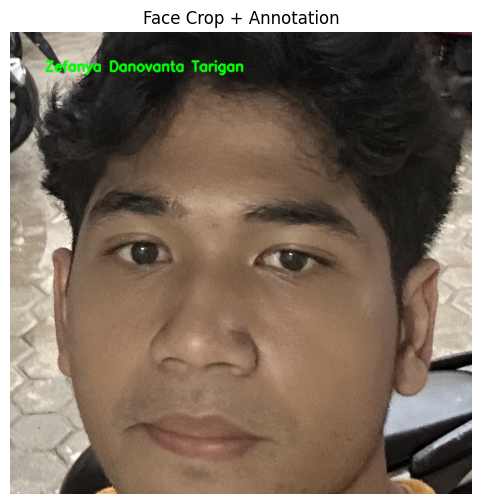

True

In [49]:
label = "Zefanya Danovanta Tarigan"

face_annotated = crop_face.copy()
cv2.putText(face_annotated, label, (75, 84),
            cv2.FONT_HERSHEY_SIMPLEX, 1,
            (0, 255, 0), 4)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(face_annotated, cv2.COLOR_BGR2RGB))
plt.title("Face Crop + Annotation")
plt.axis("off")
plt.show()

cv2.imwrite(os.path.join("results_ws4", "Soal01-FaceAnnotated.jpg"), face_annotated)

**Penjelasan**      
Efek Cropping mengakibatkan gambar akan mengarah ke objek yang ditentukan seperti wajah dan background namun saat dilakukan resize dengan ukuran 920x920 piksel, kualitas gambar akan berbeda terutama pada gambar background, hal ini terjadi karena tidak sesuai dengan skala awalnya dimana awalnya itu adalah berbentuk persegi panjang sedangkan hasil resize nya berbentuk persegi, jadi seperti berhimpitan.     

Perubahan warna saat dijadikan grayscale gambar wajah dan background tampak seperti foto hitam putih, menjadi 1 channel dengan skala abu abu tetapi intensitas cahaya masih tetap sama seperti awal. lalu pada HSV membuat kombinasi gambar tidak sesuai, dimana warna biru menjadi warna dominan dan objek tidak terlihat jelas (blur)

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


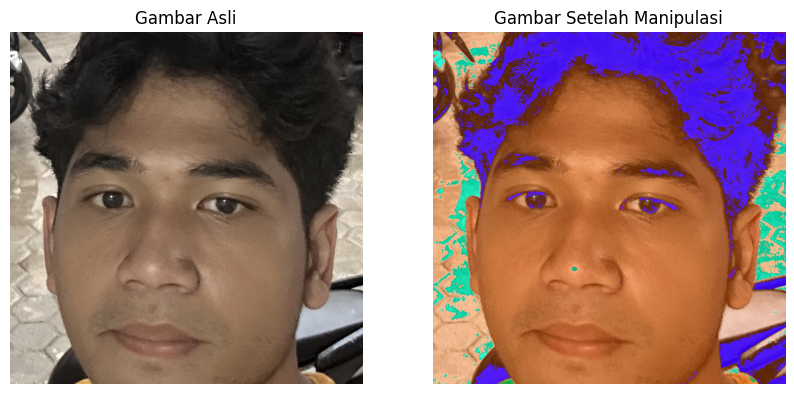

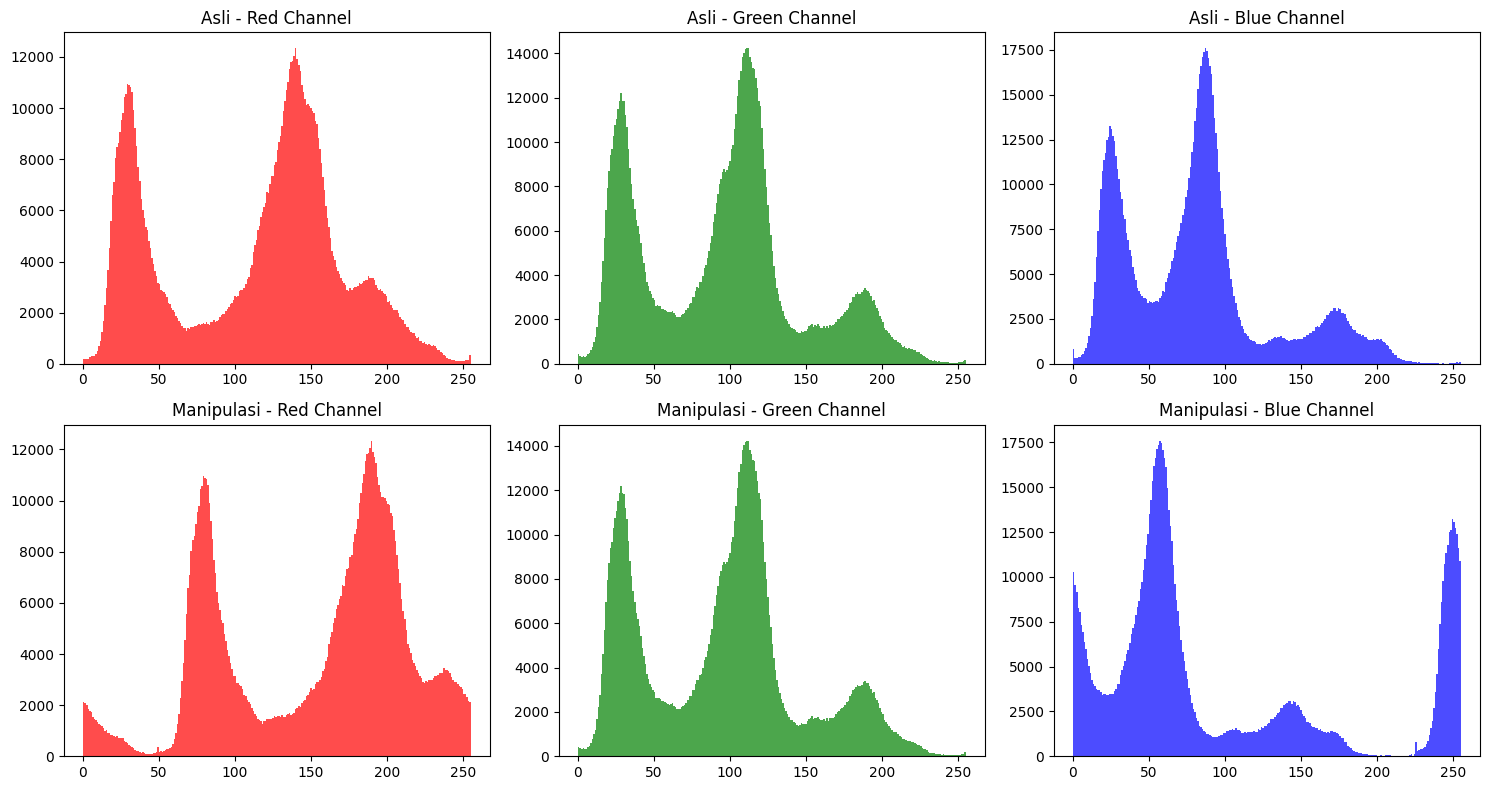

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os

soal2_path = os.path.join(os.getcwd(), "results_ws4", "Soal01-CropFace.jpg")
img = cv2.imread(soal2_path)

#Konversi 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R, G, B = cv2.split(img_rgb)

#Manipulasi Channel Warna
Red = np.clip(R + 50, 0, 255)
Blue = np.clip(B - 30, 0, 255) 

#Menggabungkan dan menyimpan gambar yang sudah dimanipulasi
img_merged = cv2.merge([Red, G, Blue])
save_path = os.path.join("results_ws4", "Soal02-ManipulasiChannel.png")
cv2.imwrite(save_path, cv2.cvtColor(img_merged, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_merged)
plt.title("Gambar Setelah Manipulasi")
plt.axis("off")
plt.show()

colors = ['red', 'green', 'blue']
titles = ['Red Channel', 'Green Channel', 'Blue Channel']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

for idx, (ch, color) in enumerate(zip([R, G, B], colors)):
    axs[0, idx].hist(ch.flatten(), bins=256, color=color, alpha=0.7)
    axs[0, idx].set_title(f"Asli - {titles[idx]}")

for idx, (ch, color) in enumerate(zip([Red, G, Blue], colors)):
    axs[1, idx].hist(ch.flatten(), bins=256, color=color, alpha=0.7)
    axs[1, idx].set_title(f"Manipulasi - {titles[idx]}")

plt.tight_layout()
plt.show()

**Penjelasan**      

Dampak perubahan RGB pada warna gambar ini mengakibatkan kombinasi warna menjadi tidak seimbang, sehingga output gambar terlihat lebih hangat dan cerah. Hal ini terjadi karena proporsi warna merah menjadi lebih dominan akibat penambahan intensitas sebesar +50, sedangkan warna biru mengalami penurunan intensitas sebesar –30. Peningkatan channel merah membuat gambar seperti lebih hangat. terlihat jelas pada histogram, di mana kurva channel Red bergeser ke kanan (lebih terang) dan channel Blue bergeser ke kiri (lebih gelap), sedangkan channel Green tetap stabil. Hal ini menunjukkan bahwa sebagian besar nilai piksel merah mendekati batas maksimum (over-saturation), sementara nilai piksel biru mendekati batas minimum, sehingga keseimbangan warna berubah secara signifikan.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


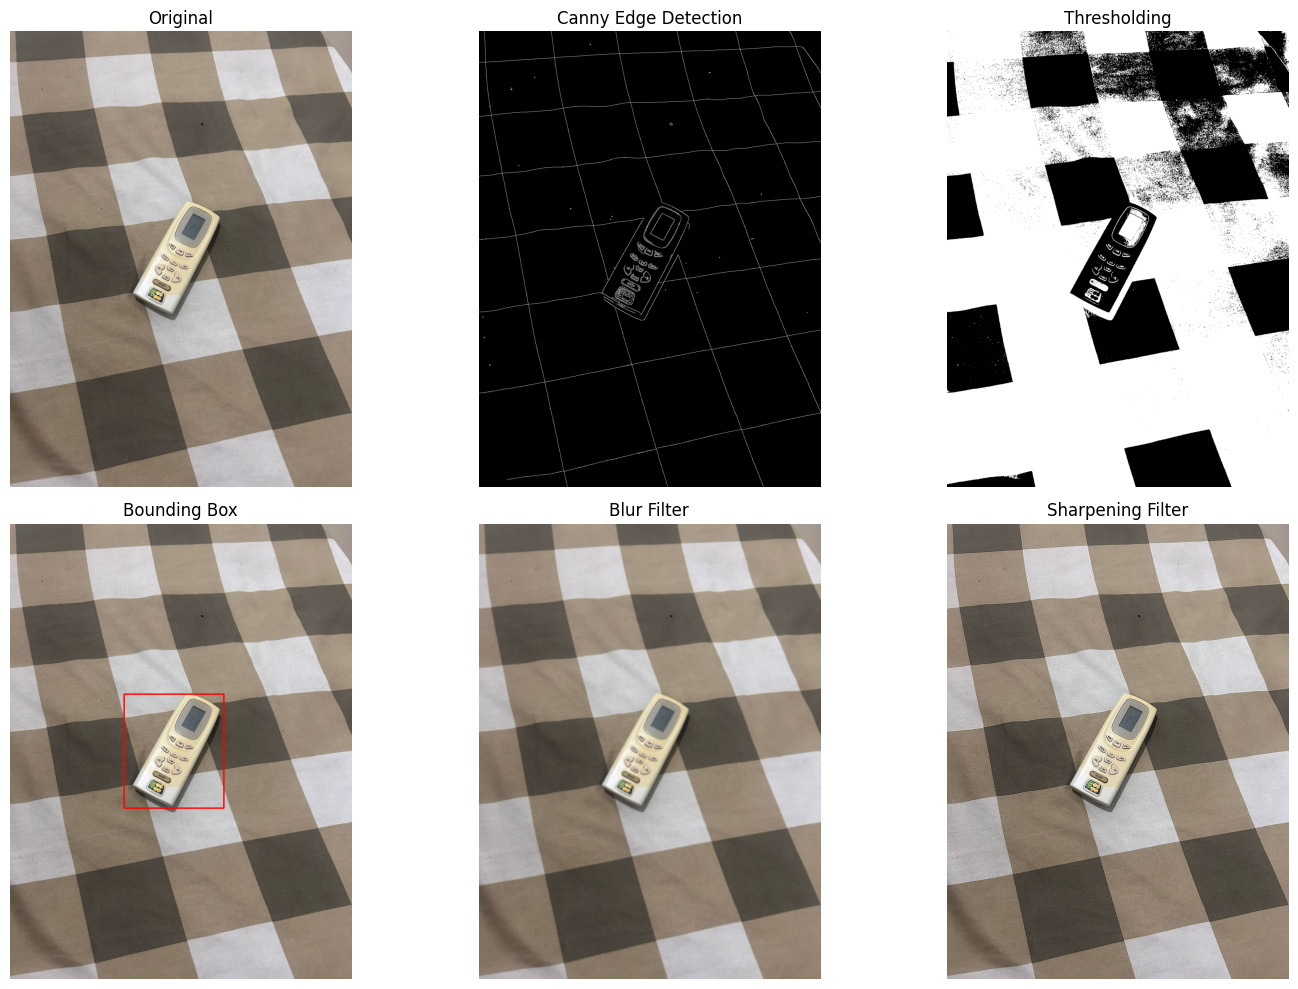

In [49]:
import cv2
import matplotlib.pyplot as plt
import os

soal3 = os.path.join(os.getcwd(), "assets_ws4", "soal3.jpg")
img = cv2.imread(soal3)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#canny detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(gray, 100, 200)

#Thresholding 
ret, thresh = cv2.threshold(gray, 153, 255, cv2.THRESH_BINARY_INV)
 
# Bounding box
x, y = 400, 600
w, h = 350, 400 
boxed_img = img_rgb.copy()
cv2.rectangle(boxed_img, (x, y), (x + w, y + h), (255, 0, 0), 3)

# Blur Filter
blurred = cv2.GaussianBlur(img_rgb, (9,9), 0)

# Sharpening Filter 
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
sharpened = cv2.filter2D(img_rgb, -1, kernel_sharpen)

plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(boxed_img)
plt.title("Bounding Box")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(blurred)
plt.title("Blur Filter")
plt.axis("off")
plt.subplot(2,3,6)

plt.imshow(sharpened)
plt.title("Sharpening Filter")
plt.axis("off")
plt.tight_layout()
plt.show()


**Penjelasan**      
Pada proses Canny Edge Detection, gambar diubah menjadi representasi garis tepi berdasarkan perubahan intensitas piksel sehingga kontur objek menjadi sangat jelas, namun informasi warna dan detail shading hilang. pada proses thresholding, gambar disederhanakan menjadi hitam-putih biner sehingga hanya bentuk dasar objek yang tersisa. seluruh detail seperti gradasi, tekstur, dan pola menjadi hilang, citra hanya tampak sebagai siluet. Pada tahapan Gaussian blur, tampilan gambar menjadi lebih halus karena noise dan detail kecil dikurangi melalui perataan nilai piksel, namun efek sampingnya adalah garis tepi dan tekstur menjadi kurang tajam sehingga bagian objek terlihat lebih lembut dan tidak detail.pada proses sharpening, detail kontras lokal dan garis tepi dibuat lebih tegas sehingga objek tampak lebih jelas dan tajam. Teknik ini meningkatkan ketegasan kontur.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

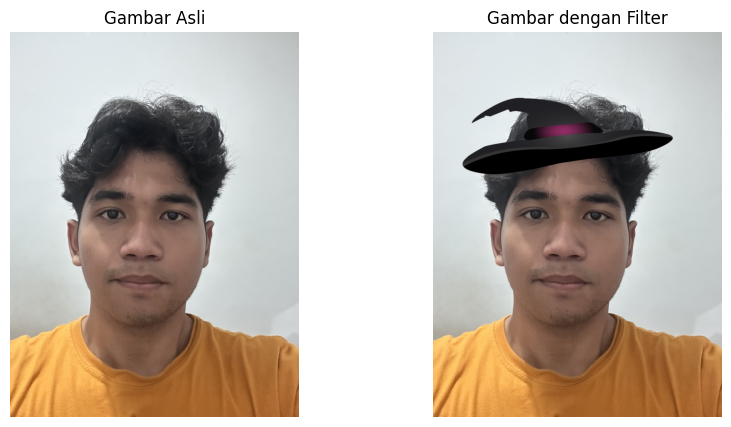

True

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import mediapipe as mp

soal4 = os.path.join(os.getcwd(), "assets_ws4", "soal4.jpg")
filter_path = os.path.join(os.getcwd(), "assets_ws4", "soal4-Filter.png")

img = cv2.imread(soal4)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

filter_png = cv2.imread(filter_path, cv2.IMREAD_UNCHANGED)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True,
                                  max_num_faces=1,
                                  refine_landmarks=True,
                                  min_detection_confidence=0.5)

results = face_mesh.process(img_rgb)


landmarks = results.multi_face_landmarks[0].landmark

head_top = landmarks[9]         
left_face = landmarks[234]     
right_face = landmarks[454]     

x_center = int(head_top.x * w)
y_center = int(head_top.y * h)

face_width = int(abs(right_face.x - left_face.x) * w)

filter_width = int(face_width * 1.7)    
filter_height = int(filter_width * 0.55) 
filter_resized = cv2.resize(filter_png, (filter_width, filter_height))

x_offset = x_center - filter_width // 2
y_offset = y_center - filter_height - 25  

output = img_rgb.copy()

for y in range(filter_height):
    for x in range(filter_width):
        if 0 <= y + y_offset < h and 0 <= x + x_offset < w:
            pixel = filter_resized[y, x]
            if pixel[3] > 0:  # cek nilai alpha
                alpha = pixel[3] / 255.0
                for c in range(3):
                    output[y + y_offset, x + x_offset, c] = \
                        (1 - alpha) * output[y + y_offset, x + x_offset, c] + \
                        alpha * pixel[c]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(output)
plt.title("Gambar dengan Filter")
plt.axis("off")
plt.show()

cv2.imwrite(os.path.join("results_ws4", "Soal04-FilterApplied.png"),
            cv2.cvtColor(output, cv2.COLOR_RGB2BGR))

**Penjelasan**      
Cara menghitung overlay dengan menentukan titik acuan terlebih dahulu pada indeks landmarks sebagai referensi posisi, yaitu landmark kiri (234), kanan (454), dan tengah dahi (9). lalu ukuran overlay dihitung berdasarkan selisih jarak landmark tepi kiri dan kanan dikalikan lebar gambar sehingga ukuran overlay dapat menyesuaikan lebar wajah dengan tepat. Setelah ukuran ditentukan, koordinat posisi x dan y dihitung dengan memusatkan overlay pada titik tengah dahi dan menggesernya ke atas menggunakan nilai offset, sehingga overlay dapat ditempatkan secara presisi dan terlihat natural di atas wajah.

Tantangan yang dihadapi selama implementasi yaitu menempatkan overlay secara presisi, yang dipengaruhi oleh akurasi landmark, perhitungan skala dan penentuan posisi pada wajah

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

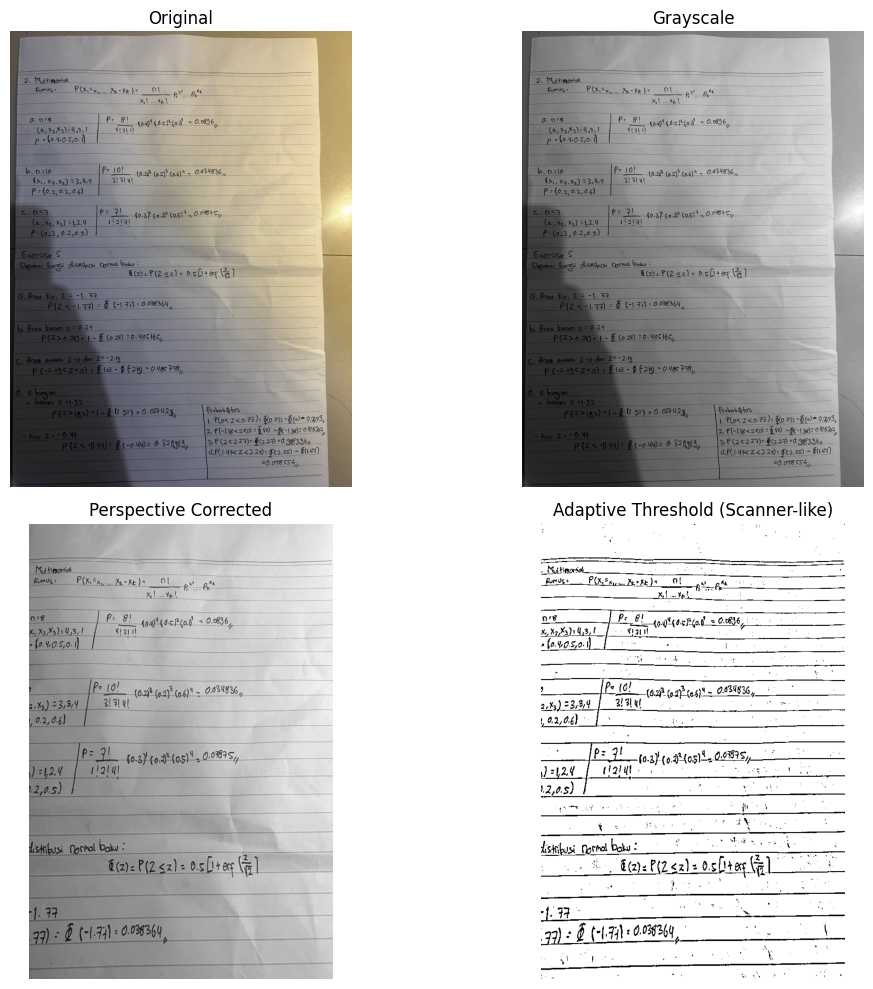

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

soal5 = os.path.join(os.getcwd(), "assets_ws4", "soal5.jpg")
img = cv2.imread(soal5)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# konversi grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pts_src = np.float32([
    [33, 25],  
    [1078, 24],   
    [950, 1030],  
    [260, 1030]  
])

width, height = 600, 900
pts_dst = np.float32([
    [0, 0],
    [width, 0],
    [width, height],
    [0, height]
])

H, _ = cv2.findHomography(pts_src, pts_dst)
warped = cv2.warpPerspective(gray, H, (width, height))

blur = cv2.GaussianBlur(warped, (35, 35), 0)
normalized = cv2.divide(warped, blur, scale=255)

adaptive = cv2.adaptiveThreshold(
    normalized,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    31,
    7
)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Original") 
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(warped, cmap='gray')
plt.title("Perspective Corrected")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(adaptive, cmap='gray')
plt.title("Adaptive Threshold (Scanner-like)")
plt.axis("off")
plt.tight_layout()
plt.show()

cv2.imwrite("results_ws4/Soal05_PerspectiveCorrected.jpg", warped)
cv2.imwrite("results_ws4/Soal05_Normalized.jpg", normalized)
cv2.imwrite("results_ws4/Soal05_FinalScanner.jpg", adaptive)

**Penjelasan**  

gambar dikonversi ke format grayscale untuk menyederhanakan informasi visual dengan hanya mempertahankan intensitas pixel. lalu dilakukan koreksi perspektif menggunakan transformasi homografi berdasarkan empat titik manual pada sudut objek, sehingga bentuk citra yang awalnya miring atau terdistorsi akibat sudut pengambilan gambar dapat diluruskan menjadi tampilan top-view. ahap berikutnya adalah normalisasi pencahayaan untuk memperbaiki ketidakseimbangan intensitas cahaya pada permukaan objek, sehingga bayangan atau pantulan cahaya tidak mengganggu keterbacaan konten di dalam citra. Terakhir, diterapkan teknik adaptive thresholding yang memungkinkan pemisahan objek dan latar secara optimal meskipun citra memiliki variasi pencahayaan, sehingga teks, gambar, atau pola menjadi lebih tajam dan jelas. rangkaian proses ini mampu meningkatkan kualitas visual citra secara signifikan sehingga lebih layak digunakan sebagai dokumen digital maupun media informasi visual.

### **Referensi**
- [ChatGPT](https://chatgpt.com/c/691b1996-c9e4-832b-9654-2c9f25770c90)
- [Referensi Github](https://github.com/informatika-itera/IF25-40305-handson/blob/main/10_image_processing_week3.ipynb)
- [Dokumen Mediapipe](https://mediapipe.readthedocs.io/en/latest/solutions/face_mesh.html)

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.